# Objective: Predict the survival of the passengers aboard RMS Titanic.

A tutorial for Kaggle's Titanic: Machine Learning from Disaster competition. Demonstrates basic data munging, analysis, and visualization techniques. Shows examples of supervised machine learning techniques.

# Data Handling

# Import Required Libraries

In [19]:

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the data set

In [20]:
df = pd.read_csv('Data/titanic data.csv')

Overview of our data

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [23]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [24]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

Deal with missing values

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The features Age and cabin have many missing values and so can’t add much value to our analysis but we require age for further analysis so we just drop cabin.

In [26]:
df = df.drop(['Cabin'], axis=1)

In [27]:
# Remove NaN values
df = df.dropna()

In [62]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [45]:
nunique = df.nunique(dropna=False)
nunique

PassengerId    712
Survived         2
Pclass           3
Name           712
Sex              2
Age             88
SibSp            6
Parch            7
Ticket         541
Fare           219
Embarked         3
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# Analyze by features

In [41]:
#Total Passengers in each class

total_passengers = df.groupby('Pclass')['PassengerId'].count()

total_passengers

Pclass
1    184
2    173
3    355
Name: PassengerId, dtype: int64

In [42]:
#Passengers survived in each class

survivors = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

survivors

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


In [53]:
#Passengers survived in each sex category

df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.752896
1,male,0.205298


In [54]:
#Passengers survived with SibSp

df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.530055
2,2,0.440000
0,0,0.368870
3,3,0.333333
4,4,0.166667
5,5,0.000000


In [55]:
#Passengers survived with Parch

df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
2,2,0.573529
1,1,0.554545
0,0,0.354528
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Analyze by visualizing data
Bar Chart for Categorical Features

Text(0.5, 1.0, 'Survival Breakdown (Survived, Died)')

<Figure size 432x288 with 0 Axes>

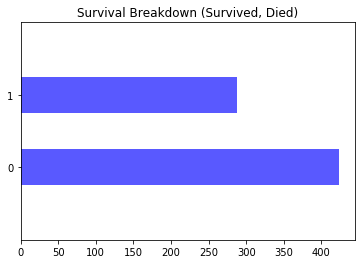

In [101]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (Survived, Died)")

In [65]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    daf = pd.DataFrame([survived,dead])
    daf.index = ['Survived','Dead']
    daf.plot(kind='bar',stacked=True, figsize=(10,5))

In [85]:
#Checking for any null values
df['Sex'].isnull().value_counts()

False    712
Name: Sex, dtype: int64

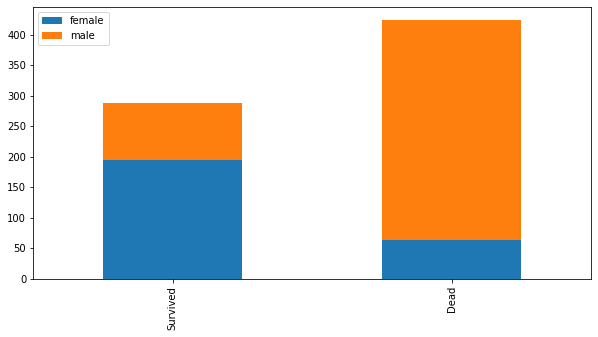

In [66]:
bar_chart('Sex')

The Chart confirms Women more likely survivied than Men

In [121]:
#Percentage of Survived/Did not Survive shows that the training Data is not balanced.
print("Survived: ", df.Survived.value_counts()[1]/len(df)*100,"%")
print("Did not Survive: ", df.Survived.value_counts()[0]/len(df)*100,"%")

Survived:  40.44943820224719 %
Did not Survive:  59.55056179775281 %


In [87]:
# Male Passengers survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)

#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()

male_survivor_percentage = male_survivors / male_total_passengers

In [88]:
# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

#Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()

female_survivor_percentage = female_survivors / female_total_passengers

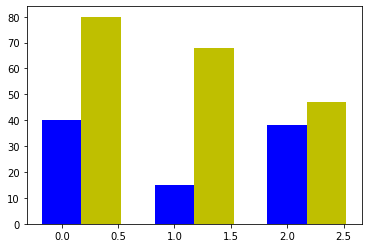

In [89]:
#Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue',
label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width,
color='y', label='Women')

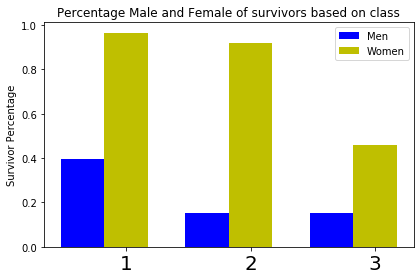

In [92]:
#Plotting the percentage of passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width,
color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage,
bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

The majority of survivors are females in all the classes

More than 90% of female passengers in first and second class survived

Female passengers were given preference for lifeboats and the majority were saved.

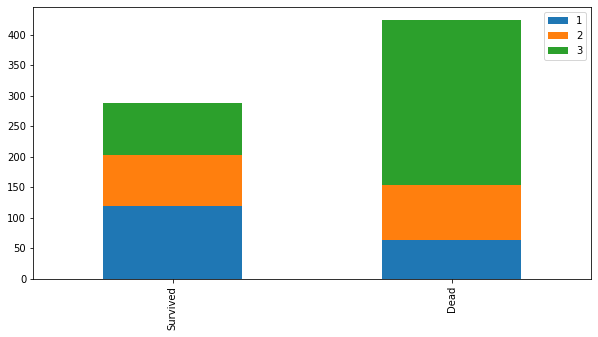

In [95]:
bar_chart('Pclass')

The Chart confirms 1st class more likely survivied than other classes.

The Chart confirms 3rd class more likely dead than other classes.

There was clearly a preference toward saving those from the first class as the ship was drowning. It also had the maximum percentage of survivors

In [94]:
#Checking for the null values
df['SibSp'].isnull().value_counts()

False    712
Name: SibSp, dtype: int64

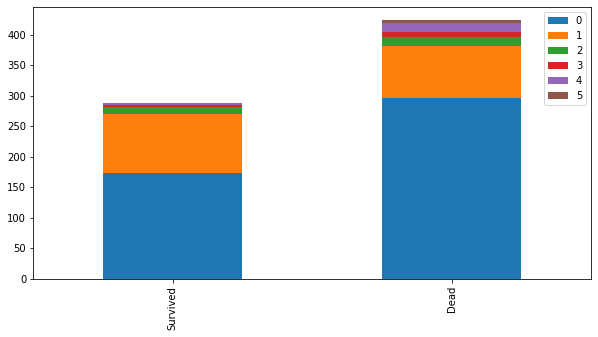

In [68]:
bar_chart('SibSp')

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.

The Chart confirms a person aboarded without siblings or spouse more likely dead

In [96]:
#Checking for the null values
df['Parch'].isnull().value_counts()

False    712
Name: Parch, dtype: int64

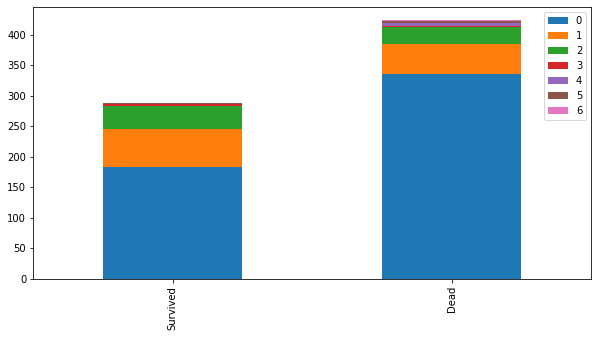

In [69]:
bar_chart('Parch')

The Chart confirms a person aboarded with more than 2 parents or children more likely survived.

The Chart confirms a person aboarded alone more likely dead

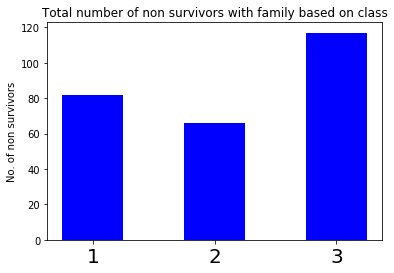

In [99]:
#Total number of non-survivors in each class
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) &
(df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')

#Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors / total_passengers

#Total number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors,
color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

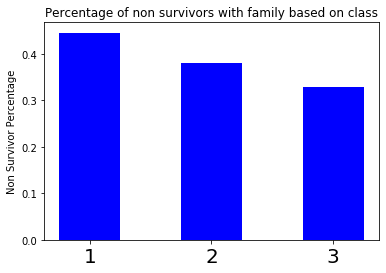

In [100]:
#Plot of percentage of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(),
non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

There are lot of nonsurvivors in the third class

Second class has the least number of nonsurvivors with relatives

With respect to the total number of passengers, the first class, who had relatives aboard, has the maximum nonsurvivor percentage and the third class has the least


Even though third class has the highest number of nonsurvivors with
relatives aboard, it primarily had passengers who did not have relatives
on the ship, whereas in first class, most of the people had relatives aboard
the ship

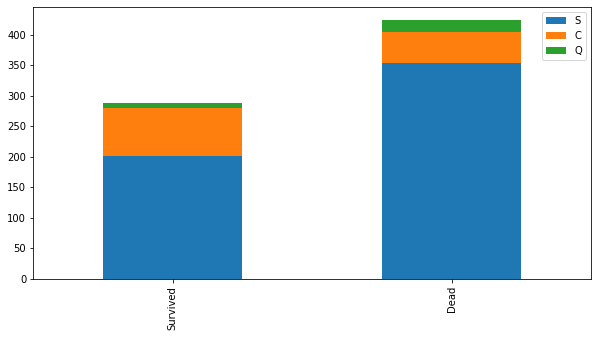

In [70]:
bar_chart('Embarked')

The Chart confirms a person aboarded from C slightly more likely survived

The Chart confirms a person aboarded from Q more likely dead

The Chart confirms a person aboarded from S more likely dead

In [82]:

#Using Pandas' apply method to create a new column "Person"
df['person'] = df.apply(lambda x: 'child' if x.Age < 18 else x.Sex,axis=1)
print(df.person.value_counts())

male      395
female    204
child     113
Name: person, dtype: int64


Text(0.5, 1.0, 'Distribution of Male/Female')

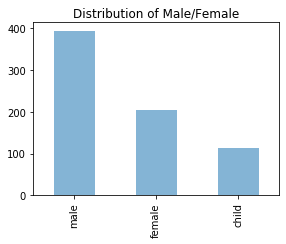

In [105]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(15,7)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.person.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# puts a title on our graph
plt.title("Distribution of Male/Female")    

In [106]:
#Checking for null values
df['Age'].isnull().value_counts()

False    712
Name: Age, dtype: int64

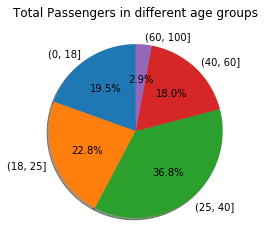

In [107]:
#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]

#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

#Removing the null rows
d_temp = df[np.isfinite(df['Age'])] # removing all na instances

#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)

#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')

#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(),
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

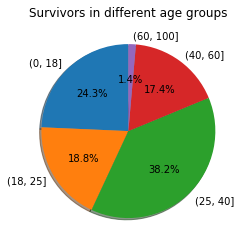

In [108]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=survivors.index.values.tolist(),
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()


The 25-40 age group has the maximum number of passengers, and 0-18 has the second highest number of passengers.

Among the people who survived, the 18-25 age group has the second highest number of survivors

The 60-100 age group has a lower proportion among the survivors.

The 25-40 age group had the maximum number of survivors compared to any other age group, and people who were old were either not lucky enough or made way for the younger people to the lifeboats.

# Feature engineering
Feature engineering is the process of using domain knowledge of the data
to create features (feature vectors) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects,
since such representations facilitate processing and statistical analysis

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [109]:
# Kaggle Source- https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Name Length
df['Name_length'] = df['Name'].apply(len)
# Is Alone?
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [110]:
# Title: (Source)
# Kaggle Source- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
df['Title']=0
df['Title']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [111]:
df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()
df = df.drop('Name', axis=1)

In [112]:
# Fill NA
# Categoricals Variable
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])
# Continuous Variable
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

There are three known approaches to treat missing values. 

First if the feature is not so important you may drop the whole column.

Or calculate the the mean value along the feature and annotate it to the missing value. This method is called Imputation.

The last method is to use imputation but also to add a new column(s) referring that the value was originally null, to assist the predictor. 

In [118]:
# Obtain target and predictors
y = df.Survived.copy()
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].copy()
X_test = df[features].copy()

In [124]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

for col in object_cols:
    #make NAN as 0 Catgory Variable
    X_test[col] = label_encoder.fit_transform(X_test[col].fillna('0'))
    X[col] = label_encoder.fit_transform(X[col].fillna('0'))

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_test = pd.DataFrame(my_imputer.fit_transform(X_test))
imputed_X = pd.DataFrame(my_imputer.fit_transform(X))
# Imputation removed column names; put them back
imputed_X_test.columns = X_test.columns
imputed_X.columns = X.columns